In [24]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
#tf.config.experimental.enable_op_determinism()

In [25]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

In [26]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [27]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [28]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [29]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [30]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [31]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


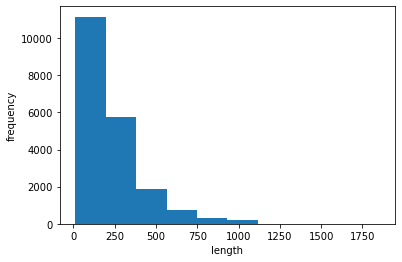

In [32]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [34]:
print(train_input.shape)
print(train_seq.shape)

(20000,)
(20000, 100)


In [35]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [36]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [37]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


### Simple RNN 만들기

In [38]:
from tensorflow import keras

model = keras.Sequential(name='imdb')

# input_shaepe = (시퀀스 길이 * 단어표현길이 (one hot encoding))
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))   # neuron:8 
model.add(keras.layers.Dense(1, activation='sigmoid', name='output'))

model.summary()

Model: "imdb"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [39]:
# one hot encoding
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [40]:
print(train_oh.shape)

(20000, 100, 500)


In [41]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [42]:
print(np.sum(train_oh[0][0]))

1.0


In [43]:
# Training RNN
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6989 - accuracy: 0.5041 - val_loss: 0.6978 - val_accuracy: 0.5038
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6946 - accuracy: 0.5102 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6901 - accuracy: 0.5302 - val_loss: 0.6916 - val_accuracy: 0.5230
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6883 - accuracy: 0.5408 - val_loss: 0.6905 - val_accuracy: 0.5270
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6866 - accuracy: 0.5472 - val_loss: 0.6894 - val_accuracy: 0.5356
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6845 - accuracy: 0.5563 - val_loss: 0.6880 - val_accuracy:

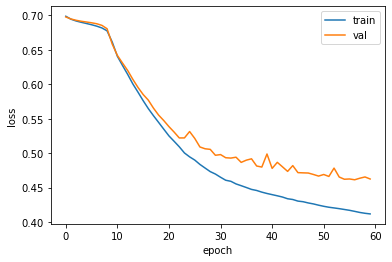

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [45]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [23]:
#tran_oh의 크기가 너무 커서 메모리 부족으로 커널이 죽을 수도 있음
#import gc

#del(train_oh)
#gc.collect()
#model = keras.models.load_mode('best-simplernn-model.h5')